# Capstone project: Webscrapping using beautiful soup

In this module you will see my capstone project, which is webscrapping by using beautiful soup. Webscrapping is a methond of getting data from the internet, and processing that data at your will. Specifically in this module we will scrap the exchange price of United States Dollars (USD) to Indonesian Rupiah (IDR).

To do the webscrapping we will be using three dependencies, namely BeautifulSoup to get data from the internet, pandas for analyzing the data, and matplotlib to visualize the data to a graph.

if you don't already have those dependencies then please install them by copy and pasting these codes below.

BeautifulSoup: `pip install beautifulsoup4`<br>
Pandas       : `pip install pandas`<br>
Matplotlib   : `pip install matplotlib`<br>

## Background

In this module we are trying to get the exchange amount of one United States Dollars to Indonesian Rupiah by webscrapping `https://www.exchange-rates.org/history/IDR/USD/T`and getting the data that we need, then we are going to focus on two data and that is the date and the exchage value of USD to IDR, then visualizing that data.

# Getting the data from the html

In [72]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [73]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [74]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Since we are trying to get the date and the exchage rate we need a common table or a placeholder that nests those two data that we are trying to get, and luckily from the html there is a table that holds both of those information, thus we are using `soup.find` to find that table and visualize it here, then to know how much data we are receiving we are going to find the row length of said table.

In [75]:
table = soup.find ('section', attrs={'class':'box history-rates-table-box'})
print(table.prettify()[1:500])

section class="box history-rates-table-box">
 <h2 class="title">
  <span>
   USD to IDR History for Last 6 Months
  </span>
 </h2>
 <div class="inner">
  <table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
   <thead>
    <tr>
     <th class="ltr-bidi-fix">
      Date
     </th>
     <th class="ltr-bidi-fix">
      US Dollar to Indonesian Rupiah
     </th>
    </tr>
   </thead>
   <tbody>
    <tr>
     <td>
      <a class="w" href="/exchange-rate-history/usd-idr-2023-04


Finding row length.

In [76]:
row = table.find_all('a', attrs={'class':'n'})
row_length = len(row)
row_length

129

After getting the table and the row length of the table, now we are scrapping the data that we want, since we are trying to find the date and exchange value in the table that we are scrapping, thus we need to identify what is date and what is exchage value in the, to do that we are going to use `.find_all` and plug in their respective html tags and their class.

In [77]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    date = table.find_all('a', attrs={'class':'n'})[i].text
    
    USD_to_IDR = table.find_all('span', attrs={'class':'n'})[i].text
    
    temp.append((date,USD_to_IDR))
    
temp 

[('2023-4-11', '$1 = Rp14,915'),
 ('2023-4-10', '$1 = Rp14,950'),
 ('2023-4-7', '$1 = Rp14,941'),
 ('2023-4-6', '$1 = Rp14,931'),
 ('2023-4-5', '$1 = Rp14,960'),
 ('2023-4-4', '$1 = Rp14,957'),
 ('2023-4-3', '$1 = Rp14,922'),
 ('2023-3-31', '$1 = Rp14,969'),
 ('2023-3-30', '$1 = Rp15,024'),
 ('2023-3-29', '$1 = Rp15,034'),
 ('2023-3-28', '$1 = Rp15,060'),
 ('2023-3-27', '$1 = Rp15,107'),
 ('2023-3-24', '$1 = Rp15,165'),
 ('2023-3-23', '$1 = Rp15,085'),
 ('2023-3-22', '$1 = Rp15,253'),
 ('2023-3-21', '$1 = Rp15,301'),
 ('2023-3-20', '$1 = Rp15,343'),
 ('2023-3-17', '$1 = Rp15,375'),
 ('2023-3-16', '$1 = Rp15,429'),
 ('2023-3-15', '$1 = Rp15,459'),
 ('2023-3-14', '$1 = Rp15,380'),
 ('2023-3-13', '$1 = Rp15,416'),
 ('2023-3-10', '$1 = Rp15,503'),
 ('2023-3-9', '$1 = Rp15,495'),
 ('2023-3-8', '$1 = Rp15,449'),
 ('2023-3-7', '$1 = Rp15,429'),
 ('2023-3-6', '$1 = Rp15,354'),
 ('2023-3-3', '$1 = Rp15,278'),
 ('2023-3-2', '$1 = Rp15,322'),
 ('2023-3-1', '$1 = Rp15,249'),
 ('2023-2-28', '$1 = R

## Creating data frame & Data wrangling

Now we are creating a data frame from what we have received.

In [78]:
import pandas as pd

df = pd.DataFrame(temp, columns=('date', 'USD_to_IDR'))
df.head()

,date,USD_to_IDR
0,2023-4-11,"$1 = Rp14,915"
1,2023-4-10,"$1 = Rp14,950"
2,2023-4-7,"$1 = Rp14,941"
3,2023-4-6,"$1 = Rp14,931"
4,2023-4-5,"$1 = Rp14,960"


We can see that the date and the USD_to_IDR is there, but we need to check its data types and replace the data type of date to `datetime64[ns]`, and the USD_to_IDR data type to `float64`, while changing the data type of date is no problem, we can see that to change the USD_to_IDR, we would have to remove a lot of characters, and for that we are going to use `.str.replace` to replace or remove characters, and then change USD_to_IDR to data type `float64`.

In [79]:
df.dtypes

date          object
USD_to_IDR    object
dtype: object

In [80]:
df['date']=df['date'].str.replace('-','/')
df['date']=df['date'].astype('datetime64[ns]')
df['USD_to_IDR']=df['USD_to_IDR'].str.replace('$', '',regex=False)
df['USD_to_IDR']=df['USD_to_IDR'].str.replace('=', '')
df['USD_to_IDR']=df['USD_to_IDR'].str.replace('Rp', '')
df['USD_to_IDR']=df['USD_to_IDR'].str.replace(',', '.')
df['USD_to_IDR']=df['USD_to_IDR'].str.replace(' ', '')
df['USD_to_IDR']=df['USD_to_IDR'].str[1:]
df['USD_to_IDR']=df['USD_to_IDR'].astype('float64')

In [81]:
df

,date,USD_to_IDR
0,2023-04-11,14.915
1,2023-04-10,14.950
2,2023-04-07,14.941
3,2023-04-06,14.931
4,2023-04-05,14.960
...,...,...
123,2022-10-20,15.562
124,2022-10-19,15.587
125,2022-10-18,15.474
126,2022-10-17,15.441


In [82]:
df.dtypes

date          datetime64[ns]
USD_to_IDR           float64
dtype: object

Now we can see that the USD_to_IDR is a `float64` data type and we can use that to make the data visualization using the help of matplotlib by setting the index of the data frame to date and using the `.plot()` to create and visualize the graph.

In [83]:
df = df.set_index('date')

<AxesSubplot:xlabel='date'>

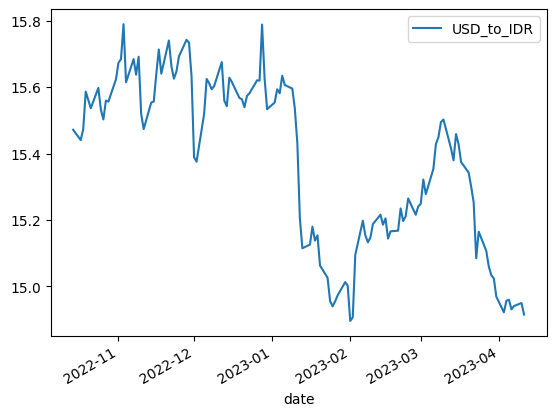

In [84]:
df.plot()

## Analysis and Conclusion

We can see the exchange rate of USD to IDR and see that from 2022-11 to 2023-01 the exchange rate of USD to IDR is quite stable despite there being ups and downs, but an outlier of the outmost is 2023-02, when all of a sudden the price USD to IDR falls quite a bit, then it rises again up until the middle of 2023-03, thats when all of a sudden it drops again.

In conclusion by using webscrapping we were able to get data from websites and use it here on this module/notebook, and using said data we were able to create a graph of said data. By using webscrapping we can also get data that we spesifically need and ignore the rest.